<a href="https://colab.research.google.com/github/chaitsugale/GENAI_STUDY_MATERIAL/blob/main/RAG_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

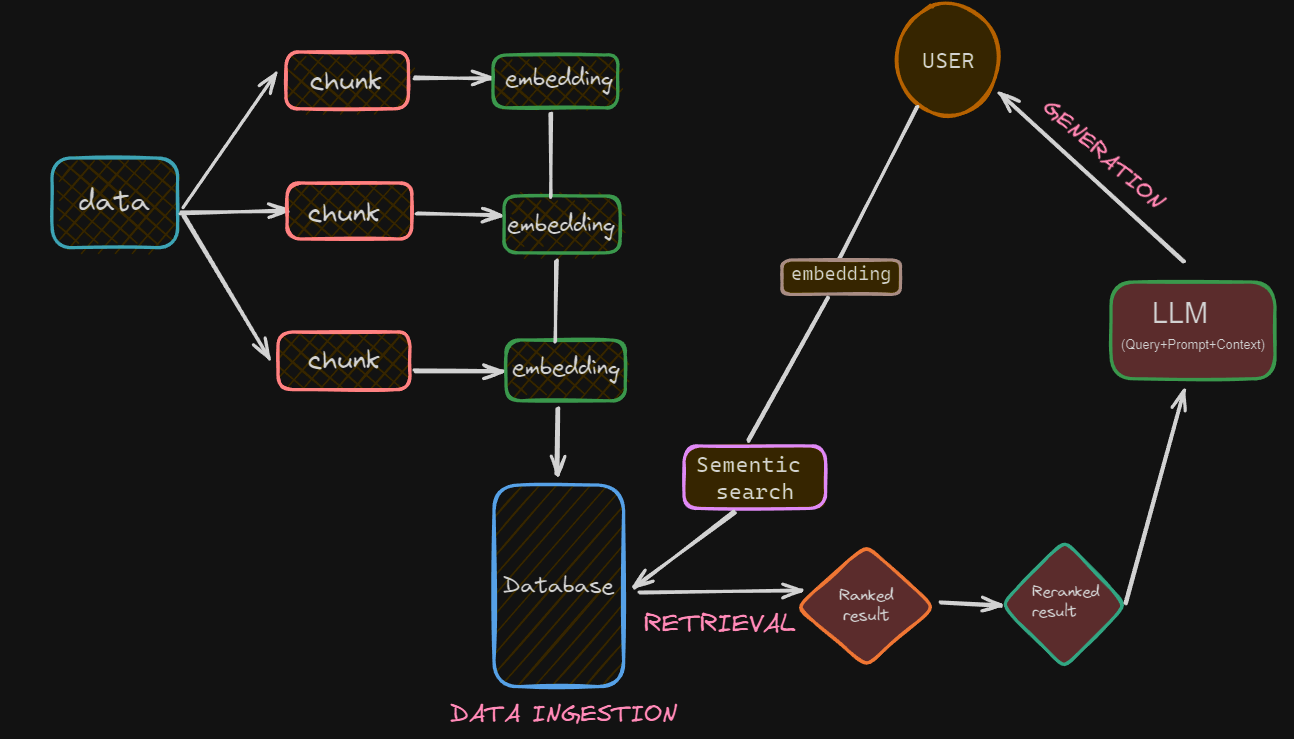

In [1]:
# corpus --> collection of token

corpus_of_documents = [
    "Take a leisurely walk in the park and enjoy the fresh air.",
    "Visit a local museum and discover something new.",
    "Attend a live music concert and feel the rhythm.",
    "Go for a hike and admire the natural scenery.",
    "Have a picnic with friends and share some laughs.",
    "Explore a new cuisine by dining at an ethnic restaurant.",
    "Take a yoga class and stretch your body and mind.",
    "Join a local sports league and enjoy some friendly competition.",
    "Attend a workshop or lecture on a topic you're interested in.",
    "Visit an amusement park and ride the roller coasters."
]

In [2]:
corpus_of_documents

['Take a leisurely walk in the park and enjoy the fresh air.',
 'Visit a local museum and discover something new.',
 'Attend a live music concert and feel the rhythm.',
 'Go for a hike and admire the natural scenery.',
 'Have a picnic with friends and share some laughs.',
 'Explore a new cuisine by dining at an ethnic restaurant.',
 'Take a yoga class and stretch your body and mind.',
 'Join a local sports league and enjoy some friendly competition.',
 "Attend a workshop or lecture on a topic you're interested in.",
 'Visit an amusement park and ride the roller coasters.']

###Cosine Similarity

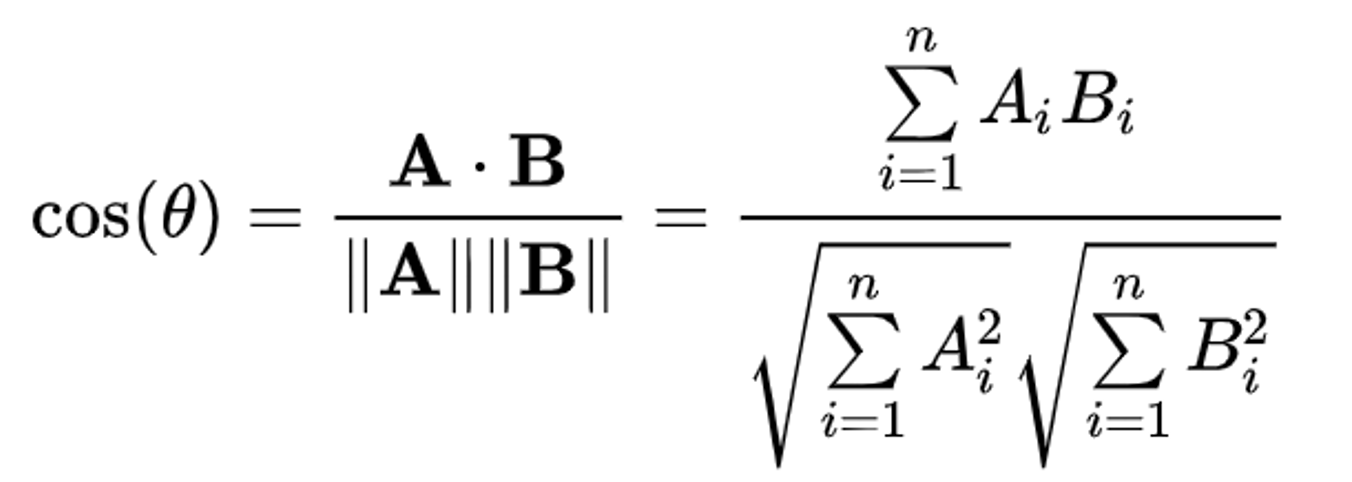

In [3]:
user_query = 'i am an indian and i live in india'

In [4]:
document = 'india is a country for the indians and for everyone'

In [5]:
query_tokens = user_query.lower().split(" ")

In [6]:
query_tokens

['i', 'am', 'an', 'indian', 'and', 'i', 'live', 'in', 'india']

In [7]:
document_tokens = document.lower().split(" ")

In [8]:
document_tokens

['india',
 'is',
 'a',
 'country',
 'for',
 'the',
 'indians',
 'and',
 'for',
 'everyone']

In [9]:
from collections import Counter

In [10]:
query_counter = Counter(query_tokens)

In [11]:
query_counter

Counter({'i': 2,
         'am': 1,
         'an': 1,
         'indian': 1,
         'and': 1,
         'live': 1,
         'in': 1,
         'india': 1})

In [12]:
document_counter = Counter(document_tokens)

In [13]:
document_counter

Counter({'india': 1,
         'is': 1,
         'a': 1,
         'country': 1,
         'for': 2,
         'the': 1,
         'indians': 1,
         'and': 1,
         'everyone': 1})

In [14]:
query_embedding = []
for token in query_counter.keys():
  query_embedding.append(query_counter[token])

In [15]:
query_embedding

[2, 1, 1, 1, 1, 1, 1, 1]

In [16]:
document_embedding = []
for token in document_counter.keys():
  document_embedding.append(document_counter[token])

In [17]:
document_embedding

[1, 1, 1, 1, 2, 1, 1, 1, 1]

In [18]:
for tokens in query_counter.keys() & document_counter.keys():
  print(tokens)

and
india


In [19]:
#a.b
my_list = []

for tokens in query_counter.keys() & document_counter.keys():
  my_list.append(query_counter[tokens]*document_counter[tokens])

In [20]:
my_list

[1, 1]

In [21]:
dot_product = sum(my_list)

In [22]:
import math

In [23]:
query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))

In [24]:
document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

In [26]:
cosine_similarity = (dot_product)/(query_magnitude + document_magnitude)

In [27]:
cosine_similarity * 100

29.495364956470947

In [30]:
#function

def cosine_similarity(query,document):
  #tokenize and convert into lowercase
  query_token = query.lower().split(" ")
  document_token = document.lower().split(" ")

  #create Counters for query and document
  query_counter= Counter(query_token)
  document_counter = Counter(document_token)

  #Calculate dot product
  dot_product = sum(query_counter[token] * document_counter[token] for token in query_counter.keys() & document_counter.keys())

  #Calculate magnitude
  query_magnitude = math.sqrt(sum(query_counter[token] ** 2 for token in query_counter))
  document_magnitude = math.sqrt(sum(document_counter[token] ** 2 for token in document_counter))

  #calculate cosine similarity
  cosine_similarity = dot_product/(query_magnitude * document_magnitude) if query_magnitude * document_magnitude !=0 else 0

  return cosine_similarity



In [31]:
cosine_similarity(user_query,document)

0.17407765595569785

In [40]:
def return_response(query,corpus):
  similarities = []
  for document in corpus:
    similarities.append(cosine_similarity(query,document))
  #return similarities
  return corpus_of_documents[similarities.index(max(similarities))]

In [33]:
corpus_of_documents

['Take a leisurely walk in the park and enjoy the fresh air.',
 'Visit a local museum and discover something new.',
 'Attend a live music concert and feel the rhythm.',
 'Go for a hike and admire the natural scenery.',
 'Have a picnic with friends and share some laughs.',
 'Explore a new cuisine by dining at an ethnic restaurant.',
 'Take a yoga class and stretch your body and mind.',
 'Join a local sports league and enjoy some friendly competition.',
 "Attend a workshop or lecture on a topic you're interested in.",
 'Visit an amusement park and ride the roller coasters.']

In [34]:
user_input = "i like fresh air"

In [35]:
return_response(user_input,corpus_of_documents)

[0.1336306209562122, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [36]:
user_input_2 = "i like to do yoga in india"

In [37]:
return_response(user_input_2,corpus_of_documents)

[0.10101525445522107,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1091089451179962,
 0.0,
 0.0,
 0.0]

In [38]:
user_input_3="Would you prefer an adrenaline rush at an amusement park or a calming hike in nature?"

In [39]:
return_response(user_input_3,corpus_of_documents)

[0.18898223650461363,
 0.08333333333333333,
 0.07856742013183861,
 0.15713484026367722,
 0.07856742013183861,
 0.29814239699997197,
 0.06804138174397717,
 0.07453559924999299,
 0.19611613513818407,
 0.31426968052735443]

In [41]:
user_input_4 = "Are you more inclined to explore someting new by visiting a local museum or dining at an ethenic restaurant?"

In [42]:
return_response(user_input_4,corpus_of_documents)

'Explore a new cuisine by dining at an ethnic restaurant.'

In [44]:
user_input="Are you more inclined to explore something new by visiting a local museum or dining at an ethnic restaurant?"

In [45]:
relevant_document=return_response(user_input,corpus_of_documents)

In [46]:
prompt = f"""
You are a bot that makes recommendations for activities. You answer in very short sentences and do not include extra information.
This is the recommended activity: {relevant_document}
The user input is: {user_input}
Compile a recommendation to the user based on the recommended activity and the user input.
"""

In [47]:
print(prompt)


You are a bot that makes recommendations for activities. You answer in very short sentences and do not include extra information.
This is the recommended activity: Explore a new cuisine by dining at an ethnic restaurant.
The user input is: Are you more inclined to explore something new by visiting a local museum or dining at an ethnic restaurant?
Compile a recommendation to the user based on the recommended activity and the user input.



In [49]:
import os
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('google_api_key')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [50]:
!pip install langchain_google_genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.9/393.9 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.9/148.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [51]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [52]:
llm = ChatGoogleGenerativeAI(model = "gemini-1.5-pro")

In [53]:
llm.invoke(prompt).content

"Try the ethnic restaurant.  It's a great way to explore. \n"